<a href="https://colab.research.google.com/github/GalinaZh/Appl_alg2021/blob/main/Applied_Alg_sem_6_Interpolation_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Занятие 6
# Прикладная алгебра и численные методы
## Интерполяция: оценка близости функций

In [ ]:
import numpy as np
import scipy.linalg
import sympy
from sympy import S
import matplotlib.pyplot as plt
from copy import deepcopy
import pandas as pd
from google.colab import files
from scipy.interpolate import  lagrange, interp1d, splrep, splev, InterpolatedUnivariateSpline, BPoly, CubicSpline
%matplotlib inline

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
import sympy
import numpy
sympy.__version__, numpy.__version__

('1.7.1', '1.19.0')

In [ ]:
!python -m pip install sympy --upgrade
!python -m pip install -U matplotlib
!pip install numpy==1.19.0

     |████████████████████████████████| 5.9MB 7.9MB/s 
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1
     |████████████████████████████████| 11.5MB 7.4MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
     |████████████████████████████████| 14.6MB 213kB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.19.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


In [ ]:
sympy.init_printing(use_unicode=False, wrap_line=False, no_global=True)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.norm.html#scipy.linalg.norm

https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html


## Многочлен Лагранжа
$$
f(x) = L(x) = \sum_{i=1}^n y_i 
\frac{(x - x_0)(x - x_1)...(x - x_{i-1})(x - x_{i+1})...(x - x_n)}{(x_i - x_0)(x_i - x_1)...(x_i - x_{i-1})(x_i - x_{i+1})...(x_i - x_n)}, 
\quad y_i = f(x_i), \quad i = 0, ..., n.
$$
## Задание 1
Построим полином Лагранжа для данных 

https://rosstat.gov.ru/folder/13397

файл rosstat_income.xlsx

Из файла считать данные о доходах в месяц в каждом квартале 2018 и 2019 гг. (сумма в год не учитывается), построить полином Лагранжа в помощью 

scipy.interpolate

Построить график полученного полинома, отметить соответствующие данные точками.

In [ ]:
poly = lagrange(X3, Y3)
Polynomial(poly).coef

array([0.0666666666666667, -0.0791666666666667, -0.916666666666667,
       1.62916666666667, 1.60000000000000], dtype=object)

## Задание 2.
Построить полином Лагранжа для данных из файла задания 1,
использовать средние значения каждого года с 2013 по 2020.

Построить график полученного полинома Лагранжа, отметить на нем все точки данных в каждом квартале. 

Вычислить и вывести на экран нормы разности вектора поквартальных доходов и вектора соответствующих значений полинома Лагранжа, реализованные для векторов в scipy.linalg.

In [1]:
from scipy.interpolate import interp1d, splrep, splev, InterpolatedUnivariateSpline, BPoly, CubicSpline

## Задание 3
Аппроксимировать $f(x) = \ln(x + 1)$ на отрезке $[0, 2]$ квадратичным сплайном с узлами с шагом 0.5.

Вычислить значения функции и сплайна в узлах равномерной сетки с шагом 0.1, найти нормы разности полученных векторов.

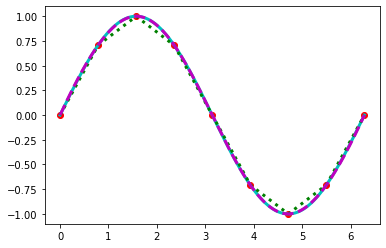

In [ ]:
X = [np.pi*k/4 for k in range(9)]
Y = [np.sin(xk) for xk in X]
plt.scatter(X, Y, color='red')
spl1 = interp1d(X, Y)
spl2 = interp1d(X, Y, kind='cubic')
xs = np.linspace(X[0], X[-1], 1000)
plt.plot(xs, np.sin(xs), 'c-', xs, spl1(xs), 'g:', xs, spl2(xs), 'm--', lw=3)

## Задание 4
Аппроксимировать $f(x) = \ln(x + 1)$ на отрезке $[0, 2]$ кубическим сплайном с узлами с шагом 0.5.

Вычислить значения функции и сплайна в узлах равномерной сетки с шагом 0.1, найти нормы разности полученных векторов.

## Кривые Безье

https://bezier.readthedocs.io/en/stable/python/reference/bezier.curve.html

## Задание 5
Построить кривую Безье с помощью модуля bezier:

https://bezier.readthedocs.io/en/stable/python/reference/bezier.curve.html

Кривая должна аппроксимировать $f(x) = x\ln(x)$, проходя через точки с шагом 0.2 отрезка [1, 3], при этом в этих точках касательная кривой Безье должна совпадать с касательной $f(x)$.

Построить на общем графике $f(x)$ и кривую Безье, отметить узловые точки.

In [ ]:
!pip install bezier --user

In [ ]:
import bezier

In [ ]:
nodes = np.array([X, Y])
curve = bezier.Curve(nodes, degree=2)
curve

<Curve (degree=2, dimension=2)>

In [ ]:
curve.evaluate(0.75)

array([[1.625 ],
       [2.8125]])

In [ ]:
s_vals = np.linspace(0.0, 1.0, 5)
curve.evaluate_multi(s_vals)

array([[-1.    , -0.375 ,  0.5   ,  1.625 ,  3.    ],
       [ 3.    ,  3.3125,  3.25  ,  2.8125,  2.    ]])

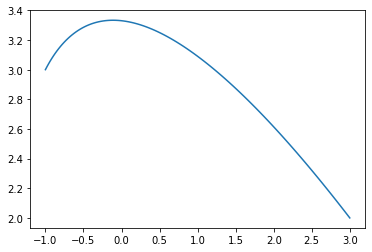

In [ ]:
curve.plot(100)

In [ ]:
curve.implicitize()